# **Project 4**
**Linear Regression**

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [ ]:
import time
import scipy
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Online_News_Popularity.csv',
    index_col=0
)
print('Setup complete')

Setup complete


Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

If we insert a column of $1$s before standardization, we may encounter the issue of division by zero, leading to a mathematical failure. Additionally, standardization is often employed to mitigate issues arising from variations in feature scales. However, the bias term (the column of ones) is typically treated as a constant and does not undergo standardization.

In [ ]:
### YOUR CODE HERE ###
df

,article_url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,amazon-instant-video-browser,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,ap-samsung-sponsored-tweets,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,apple-40-billion-app-downloads,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,astronaut-notre-dame-bcs,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,att-u-verse-apps,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,samsung-app-autism,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,seth-rogen-james-franco-will-live-tweet-the-in...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,son-pays-off-mortgage,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,ukraine-blasts,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
def standardize_df(df):
  col_means = df.mean() # Calculate mean and standard deviation for each column
  col_stddevs = df.std()

  df_std = (df - col_means) / col_stddevs # Standardize each column

  return df_std

df = df.select_dtypes(include='number') # only keep numerical columns
df_train, df_val = train_test_split(df, test_size=0.2, random_state=1) # Split the data into training (80%) and validation (20%)

train_means = df_train.mean() # Calculate mean and standard deviation for the training set (except of the last one)
train_stddevs = df_train.std()

df_train.iloc[:,:-1] = (df_train.iloc[:,:-1] - train_means[:-1]) / train_stddevs[:-1]# Standardize the training set
df_val.iloc[:,:-1] = (df_val.iloc[:,:-1] - train_means[:-1]) / train_stddevs[:-1] # Standardize the validation set

In [ ]:
df_train

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
6149,1.231336,-0.188055,-0.620724,0.022760,-0.000561,0.014341,-0.345477,0.434036,-0.429269,-0.303878,...,-0.634022,-0.227494,0.987848,1.228136,0.081750,-0.871974,-0.271252,0.840637,-0.691257,968
4319,1.399517,-0.188055,-0.342896,0.006463,-0.000561,0.008346,0.270173,-0.592605,-0.429269,-0.303878,...,-0.634022,-1.034381,-1.869974,-0.264449,-3.030516,-0.871974,-0.271252,0.840637,-0.691257,1300
17627,0.156844,-0.188055,0.538999,-0.029133,-0.000561,-0.018743,-0.345477,-0.079284,-0.429269,-0.303878,...,-0.459132,0.982835,0.275360,-0.264449,-0.436961,1.395443,1.365587,-0.571271,1.229198,917
6785,1.170604,0.284991,-0.538639,0.015401,-0.000561,0.021596,-0.697277,-0.079284,-0.549923,-0.063314,...,0.574312,-0.630938,0.208442,0.079993,0.081750,-0.871974,-0.271252,0.840637,-0.691257,774
3241,1.492951,-1.607196,0.027542,-0.008305,-0.000561,-0.008283,-0.169577,-0.849265,-0.429269,-0.303878,...,0.065539,-0.227494,0.190955,-0.264449,0.081750,-0.871974,-0.271252,0.840637,-0.691257,783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1.072498,-1.134149,0.488485,-0.016261,-0.000561,-0.011497,0.270173,-0.335945,-0.429269,-0.303878,...,-0.867210,-0.630938,0.097485,-1.642220,0.600461,1.446975,-0.271252,-0.483026,-0.691257,2200
32511,-1.099844,0.284991,-0.342896,0.008260,-0.000561,0.008620,0.446072,0.177376,-0.308614,-0.303878,...,0.065539,-1.034381,0.844957,0.768879,0.773365,1.446975,1.617408,-0.483026,1.524652,2700
5192,1.324770,0.758038,-0.841724,0.029618,-0.000561,0.025593,-0.873177,-0.849265,-0.549923,-0.303878,...,0.065539,0.982835,1.094552,1.156377,0.378157,-0.562780,-0.271252,0.311171,-0.691257,7400
12172,0.670731,0.284991,-0.858562,0.035688,-0.000561,0.052064,-0.785227,-0.592605,-0.549923,-0.303878,...,0.065539,0.579392,-1.869974,0.079993,-4.067938,0.797669,0.333120,-1.594904,0.017834,976


In [ ]:
df_train = pd.concat([pd.DataFrame(np.ones((df_train.shape[0], 1)), columns=['bias'], index=df_train.index),df_train], axis=1)
df_val = pd.concat([pd.DataFrame(np.ones((df_val.shape[0], 1)), columns=['bias'], index=df_val.index),df_val], axis=1)

In [ ]:
df_val

,bias,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
27187,1.0,-0.698077,0.758038,1.683988,-0.054207,-0.000561,-0.073287,3.524320,-0.079284,3.431664,...,-0.634022,0.982835,0.269395,-0.953335,0.321155,0.596694,0.295346,-1.674323,-0.026485,5200
2277,1.0,1.581713,-0.188055,0.010704,-0.005244,-0.000561,0.002127,0.006323,0.947357,-0.429269,...,-0.867210,0.982835,-0.215902,0.079993,-0.494595,-0.562780,-0.271252,0.311171,-0.691257,2300
18309,1.0,0.068082,1.231085,0.425342,-0.031661,-0.000561,-0.031414,0.094273,-0.592605,-0.429269,...,-0.634022,-0.630938,0.521596,-0.264449,0.600461,0.309586,0.254875,-1.182677,-0.073968,3300
15731,1.0,0.343712,0.758038,1.385112,-0.018676,-0.000561,-0.007758,1.589421,-0.849265,-0.429269,...,-0.867210,0.982835,0.076135,-0.264449,0.081750,0.673992,1.617408,-1.806690,1.524652,2200
11849,1.0,0.703433,1.231085,-0.462867,0.016304,-0.000561,0.019697,-0.521377,-0.335945,-0.549923,...,0.574312,-1.034381,0.130501,0.079993,0.600461,-0.871974,-0.271252,0.840637,-0.691257,5200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21043,1.0,-0.179518,-2.080242,-0.027182,-0.039392,-0.000561,-0.069837,1.941221,-0.335945,3.069702,...,0.065539,0.310430,0.165141,-0.494078,0.081750,2.219958,1.617408,0.840637,1.524652,5100
12302,1.0,0.661388,-0.661102,-0.519696,-0.010340,-0.000561,-0.009324,-0.697277,-0.335945,-0.429269,...,0.065539,0.175949,0.403293,0.941100,-0.609864,-0.871974,-0.271252,0.840637,-0.691257,2500
29154,1.0,-0.842900,-0.661102,0.019123,-0.006916,-0.000561,0.002538,-0.081627,-0.849265,-0.429269,...,-0.867210,0.579392,1.077155,1.228136,0.600461,-0.871974,-0.271252,0.840637,-0.691257,1600
37165,1.0,-1.422191,0.284991,-0.622829,-0.019719,-0.000561,-0.059146,0.709922,-0.079284,1.380544,...,0.065539,-0.227494,1.247650,1.457764,0.081750,-0.871974,-0.271252,0.840637,-0.691257,3800


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
### YOUR CODE HERE ###
#Here, implement the direct solution of the linear regression problem on the training set
x_tr = df_train.iloc[:,:-1]
y_tr = df_train.iloc[:,-1]
W = np.dot(scipy.linalg.inv(np.dot(x_tr.T, x_tr)), np.dot(x_tr.T, y_tr)) # analytical solution
yPred_tr = np.dot(x_tr, W) # prediction
rmse_train = np.sqrt(mean_squared_error(yPred_tr, y_tr))

x_val = df_val.iloc[:,:-1]
y_val = df_val.iloc[:,-1]
yPred_val = np.dot(x_val, W) # prediction
rmse_val = np.sqrt(mean_squared_error(yPred_val, y_val))

In [ ]:
print('The root-mean-square error (RMSE) for the training set is',rmse_train)
print('The root-mean-square error (RMSE) for the validation set is',rmse_val)

The root-mean-square error (RMSE) for the training set is 12166.051416192777
The root-mean-square error (RMSE) for the validation set is 8267.071111675188


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**


See below the plot of RMSE vs epoch (training and validation) for the gradient descent case.
* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

  **Hint**: Initialize your weights with small random numbers (<$0.001$)

The model is underfitting because the RMSE is high for both the training data and validation data, which indicates that the linear model may be too simple to capture all the underlying patterns.

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

Epoch refers to a single pass through the entire training dataset. So, the model has seen all the data in the training set after one epoch. Whereas, iteration refers to a single update of the model parameters. For example, in the mini-batch case, a mini-batch of training examples is used to update the model parameters in one iteration, and there could be multiple iterations within one epoch; in the SGD case, in each epoch, there are many iterations (the total number of iterations is equal to the number of total training examples), in each iteration, one randomly selected training example is used to update the model parameters.

In [ ]:
start_time = time.time() ## Records current time
np.random.seed(2)

## GD Script -- Sample code in tutorial! ##
w_gd = np.random.uniform(0, 0.001, size=(1, df_train.shape[1]-1)) # initial weights
lr = .01  # Learning rate
rmse_ds =[] # RMSE direct solution
rmse_gd = [] # RMSE gradient descent validation
rmse_gd_tr = [] # RMSE gradient descent training

for epoch in range (0, 5000):
  #Gradient descent
  x_tr = df_train.iloc[:,:-1]
  y_tr = df_train.iloc[:,-1].values.reshape(-1, 1)
  yPred_tr = np.dot(x_tr,w_gd.T).reshape(-1,1)
  rmse_tr = np.sqrt(mean_squared_error(yPred_tr, y_tr))
  rmse_gd_tr.append(rmse_tr)

  x_val = df_val.iloc[:,:-1]
  y_val = df_val.iloc[:,-1].values.reshape(-1, 1)
  yPred_val = np.dot(x_val,w_gd.T).reshape(-1,1)
  rmse_val = np.sqrt(mean_squared_error(yPred_val, y_val))
  # print(x_val.T.shape)
  # print(yPred_val.shape)
  # print(y_val.shape)
  gradient = (1/len(y_val) * np.dot(x_val.T, yPred_val - y_val)).reshape(1,-1)
  w_gd = w_gd - lr * gradient # weight update
  rmse_gd.append(rmse_val)

  #Direct solution
  # x_tr = df_train.iloc[:,:-1]
  # y_tr = df_train.iloc[:,-1]
  w_ds = np.dot(scipy.linalg.inv(np.dot(x_tr.T, x_tr)), np.dot(x_tr.T, y_tr)) # analytical solution
  yPred_tr = np.dot(x_tr, w_ds) # prediction
  rmse_train = np.sqrt(mean_squared_error(yPred_tr, y_tr))

  # x_val = df_val.iloc[:,:-1]
  # y_val = df_val.iloc[:,-1]
  yPred_val = np.dot(x_val, w_ds) # prediction
  rmse_val = np.sqrt(mean_squared_error(yPred_val, y_val))
  rmse_ds.append(rmse_val)

  print('ep',epoch)
  print('RMSE GD',rmse_gd[epoch])
  print('RMSE DS',rmse_ds[epoch],'\n')
  if rmse_gd[epoch] <= 1.001*rmse_ds[epoch]:
    break

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

ep 0
RMSE GD 9005.167283507542
RMSE DS 8267.071111675188 

ep 1
RMSE GD 8982.534504372155
RMSE DS 8267.071111675188 

ep 2
RMSE GD 8960.753628845261
RMSE DS 8267.071111675188 

ep 3
RMSE GD 8939.780701975418
RMSE DS 8267.071111675188 

ep 4
RMSE GD 8919.57443173594
RMSE DS 8267.071111675188 

ep 5
RMSE GD 8900.096022329097
RMSE DS 8267.071111675188 

ep 6
RMSE GD 8881.309017340047
RMSE DS 8267.071111675188 

ep 7
RMSE GD 8863.179152263316
RMSE DS 8267.071111675188 

ep 8
RMSE GD 8845.674215933002
RMSE DS 8267.071111675188 

ep 9
RMSE GD 8828.763920398615
RMSE DS 8267.071111675188 

ep 10
RMSE GD 8812.419778800773
RMSE DS 8267.071111675188 

ep 11
RMSE GD 8796.614990814793
RMSE DS 8267.071111675188 

ep 12
RMSE GD 8781.324335244868
RMSE DS 8267.071111675188 

ep 13
RMSE GD 8766.524069367173
RMSE DS 8267.071111675188 

ep 14
RMSE GD 8752.191834636216
RMSE DS 8267.071111675188 

ep 15
RMSE GD 8738.306568385113
RMSE DS 8267.071111675188 

ep 16
RMSE GD 8724.848421166967
RMSE DS 8267.071111

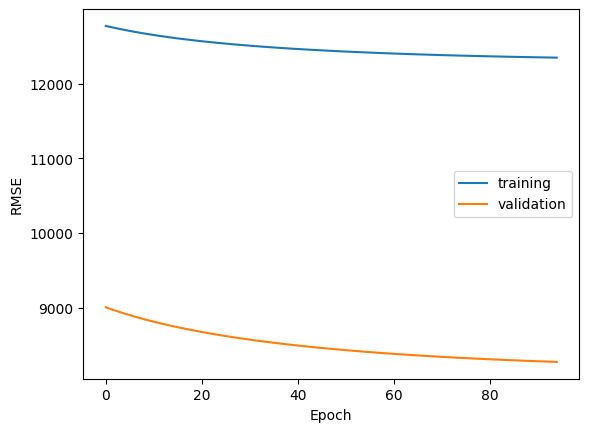

In [ ]:
#Plot the training RMSE and the validation RMSE vs. epoch
plt.plot(rmse_gd_tr,label='training')
plt.plot(rmse_gd,label='validation')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training. (*'w_gd' returned by my function*)
 * The training RMSE at each epoch. (*'rmse_gd_tr' returned by my function*)
 * The validation RMSE at each epoch. (*'rmse_gd' returned by my function*)
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]). (*'ep_time' returned by my function*)

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).

  *In my design, it stops when the validation RMSE increases for 10 consecutive epochs.*
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

From the plot of RMSE vs. epoch (validation and training), it's obvious that the rate of decrease in RMSE becomes smaller as we increase the batch size, and it also take more epochs to converge when the batch size is larger.

From the plot of RMSE vs. time (validation and training), we observe that the time taken to converge is the smallest when the batch size is 2048, while its ending RMSE is comparable to that of other batch sizes. We can also see that the rate of decrease in RMSE first goes up then goes down as we increase the batch size.

From the plot of total training time vs. batch size, it's evident that a batch size of 2048 is the most time-efficient among the options.

In [ ]:
def mini_batch_SGD(df_train,df_val,batch_size,lr,CT,disp=0):

  np.random.seed(2)

  w_gd = np.random.uniform(0, 0.001, size=(1, df_train.shape[1]-1))
  lr = lr  # Learning rate
  rmse_gd = []  # RMSE gradient descent validation
  rmse_gd_tr = []  # RMSE gradient descent training
  ep_time = []  # time for each episode
  batch_size = batch_size
  n_batch = math.ceil(len(df_train) / batch_size)
  CT = CT # convergence criteria
  rmse_last = 1e6 # set a large number as the inital last time rmse_val
  stop_count = 0 # stop when validation RMSE getting larger
  check_converge = 1 # 1 means converge, 0 means diverge

  for epoch in range(0, 5000):
    start_time = time.time() # Records current time
    for batch_start in range(0, len(df_train), batch_size):
      batch_end = min(batch_start + batch_size, len(df_train))
      batch_data = df_train.iloc[batch_start:batch_end, :]

      x_tr = batch_data.iloc[:, :-1]
      y_tr = batch_data.iloc[:, -1].values.reshape(-1, 1)
      yPred_tr = np.dot(x_tr, w_gd.T).reshape(-1, 1)

      #Gradient descent
      gradient = (1 / len(y_tr) * np.dot(x_tr.T, yPred_tr - y_tr)).reshape(1, -1)
      w_gd = w_gd - lr * gradient  # weight update

    #Calculate RMSE for the entire training dataset
    yPred_gd_tr = np.dot(df_train.iloc[:, :-1], w_gd.T).reshape(-1, 1)
    rmse_gd_epoch = np.sqrt(mean_squared_error(yPred_gd_tr, df_train.iloc[:, -1].values.reshape(-1, 1)))
    rmse_gd_tr.append(rmse_gd_epoch)

    x_val = df_val.iloc[:,:-1]
    y_val = df_val.iloc[:,-1].values.reshape(-1, 1)
    yPred_val = np.dot(x_val,w_gd.T).reshape(-1,1)
    rmse_val = np.sqrt(mean_squared_error(yPred_val, y_val))
    rmse_gd.append(rmse_val)

    diff = rmse_last - rmse_val # last time rmse_val - current time rmse_val (if improving, should be positive value)
    rmse_last = rmse_gd[epoch] # update the last time rmse_val

    #Shuffle the entire training set
    shuffled_indices = np.random.permutation(df_train.index) # Shuffle the indices
    df_train = df_train.loc[shuffled_indices].reset_index(drop=True) # Create a new DataFrame with shuffled rows

    #Record the time elapsed
    time_elapsed = time.time() - start_time
    ep_time.append(time_elapsed)

    if disp:
      print('ep',epoch)
      print('RMSE training',rmse_gd_tr[epoch])
      print('RMSE validation',rmse_gd[epoch],'\n')

    if (diff > 0) and (diff/rmse_gd[epoch] <= CT):
      break
    elif diff < 0:
      stop_count += 1
    elif diff > 0:
      stop_count = 0

    if stop_count >= 10:
      check_converge = 0
      if disp:
        print('Stop due to divergence')
      break

  ep_time = [sum(ep_time[:i+1]) for i in range(len(ep_time))]

  return w_gd,rmse_gd_tr,rmse_gd,ep_time,check_converge

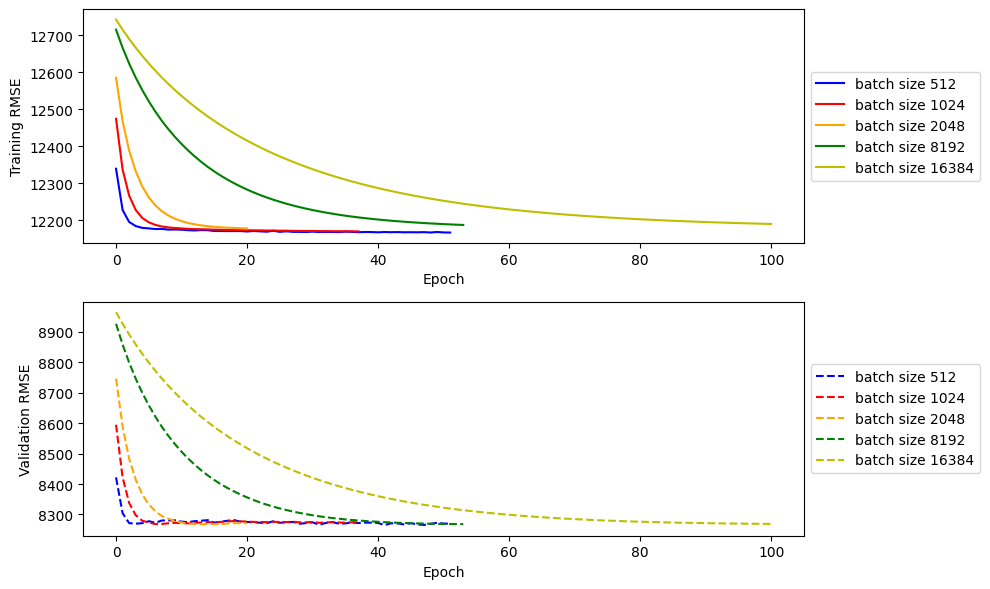

In [ ]:
#Plot training and validation RMSE vs. epoch for all the converging batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE
batch_size_list = [512,1024,2048,8192,16384]
color_list = ['b','r','orange','g','y']

fig, axes = plt.subplots(2, figsize=(10, 6))
for i in range(len(color_list)):
  w_gd,rmse_gd_tr,rmse_gd,ep_time,_ = mini_batch_SGD(df_train=df_train,df_val=df_val,batch_size=batch_size_list[i],lr=0.01,CT=0.00002)
  axes[0].plot(rmse_gd_tr,label='batch size '+str(batch_size_list[i]),color=color_list[i],linestyle='-')
  axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  axes[0].set_ylabel('Training RMSE')
  axes[0].set_xlabel('Epoch')
  axes[1].plot(rmse_gd,label='batch size '+str(batch_size_list[i]),color=color_list[i],linestyle='--')
  axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  axes[1].set_ylabel('Validation RMSE')
  axes[1].set_xlabel('Epoch')
plt.tight_layout()
plt.show()

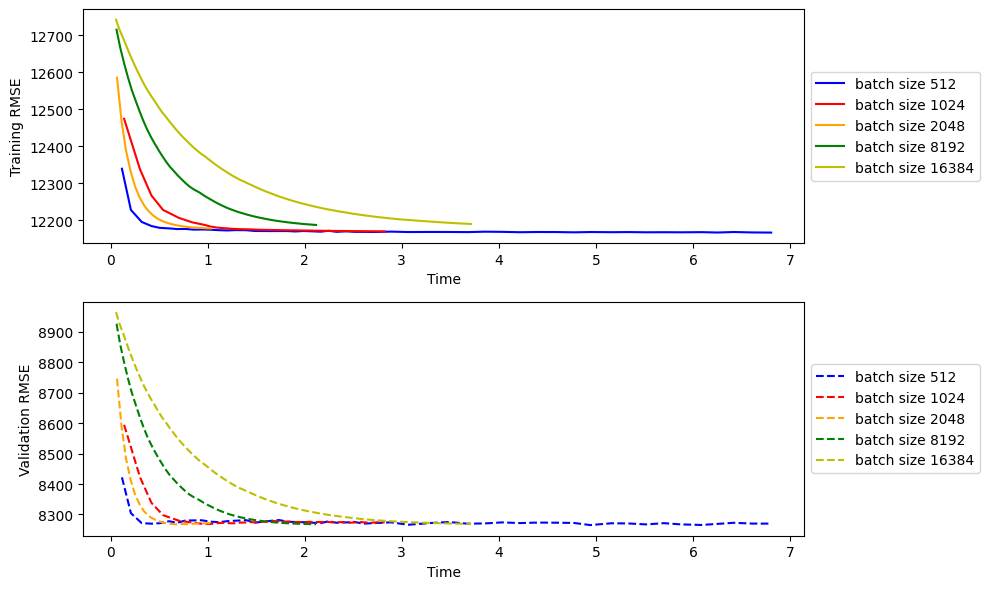

In [ ]:
#Plot training and validation RMSE vs. time for all the converging batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE
batch_size_list = [512,1024,2048,8192,16384]
color_list = ['b','r','orange','g','y']

fig, axes = plt.subplots(2, figsize=(10, 6))
for i in range(len(color_list)):
  w_gd,rmse_gd_tr,rmse_gd,ep_time,_ = mini_batch_SGD(df_train=df_train,df_val=df_val,batch_size=batch_size_list[i],lr=0.01,CT=0.00002)
  axes[0].plot(ep_time,rmse_gd_tr,label='batch size '+str(batch_size_list[i]),color=color_list[i],linestyle='-')
  axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  axes[0].set_ylabel('Training RMSE')
  axes[0].set_xlabel('Time')
  axes[1].plot(ep_time,rmse_gd,label='batch size '+str(batch_size_list[i]),color=color_list[i],linestyle='--')
  axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  axes[1].set_ylabel('Validation RMSE')
  axes[1].set_xlabel('Time')
plt.tight_layout()
plt.show()

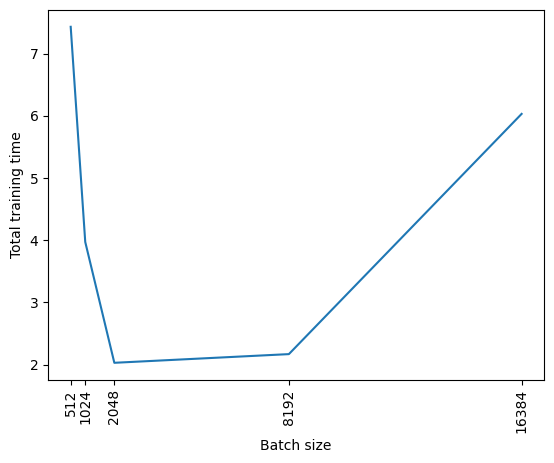

In [ ]:
#Plot Total training time (y-axis) vs. Batch size (x-axis)
batch_size_list = [512,1024,2048,8192,16384]
total_time_list = []

for i in range(len(batch_size_list)):
  w_gd,rmse_gd_tr,rmse_gd,ep_time,_ = mini_batch_SGD(df_train=df_train,df_val=df_val,batch_size=batch_size_list[i],lr=0.01,CT=0.00002)
  total_time_list.append(ep_time[-1])

plt.plot(batch_size_list,total_time_list)
plt.xticks(batch_size_list,rotation=90)
plt.ylabel('Total training time')
plt.xlabel('Batch size')
plt.show()

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

In order to display my results clearly, I store my results to 3 tables. Table "find_lr_df" shows the convergence information, table "find_lr_df2" shows the training RMSE information, table "find_lr_df3" shows the validation RMSE information. From the tables, it is evident that a smaller batch size requires a smaller learning rate.

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

From the plots of RMSE vs. epoch (training and validation), as we increase the learning rate, the rate of decrease in RMSE is larger, and it generally takes more epochs to converge. Similarly, from the plots of RMSE vs. time (training and validation), as we increase the learning rate, the rate of decrease in RMSE is larger, and it generally takes more time to converge.

From the Validation RMSE vs. epoch plot and the Validation RMSE vs. time plot, we can observe that as we increase the learning rate, the ending RMSE first decreases and then increases. This implies that there exists an optimal learning rate somewhere in the middle of the learning rate range.

In [ ]:
### YOUR CODE HERE ###
find_lr_df = pd.DataFrame(columns=['learning_rate', 'batch_size_64', 'batch_size_128', 'batch_size_256']) # create a table to store convergence info
find_lr_df2 = pd.DataFrame(columns=['learning_rate', 'batch_size_64', 'batch_size_128', 'batch_size_256']) # create a table to store training RMSE info
find_lr_df3 = pd.DataFrame(columns=['learning_rate', 'batch_size_64', 'batch_size_128', 'batch_size_256']) # create a table to store validation RMSE info

start_value = 0.0005 # starting learning rate
step_size = 0.0005 # increment
num_entries = 10 # total 10 learning rates

lr_list = [round(start_value + i * step_size,4) for i in range(num_entries)] # Creating the learning rate list

find_lr_df['learning_rate'] = lr_list # add learning rates to table
find_lr_df2['learning_rate'] = lr_list # add learning rates to table
find_lr_df3['learning_rate'] = lr_list # add learning rates to table

diverge_batch_list = [64,128,256] # the 3 batch sizes that do not converge with learning rate = 0.01

for i in range(len(diverge_batch_list)):
  check_converge_list = [] # store convergence results for each batch size
  train_rmse_list = [] # store training RMSE results for each batch size
  val_rmse_list = [] # store validation RMSE results for each batch size
  for j in range(len(lr_list)):
    w,_,_,_,check_converge = mini_batch_SGD(df_train=df_train,df_val=df_val,batch_size=diverge_batch_list[i],lr=lr_list[j],CT=0.00002) # check each learning rate

    #Calculate the training and validation RMSE using the final weights
    x_tr = df_train.iloc[:,:-1]
    y_tr = df_train.iloc[:,-1].values.reshape(-1, 1)
    yPred_tr = np.dot(x_tr,w.T).reshape(-1,1)
    rmse_tr = np.sqrt(mean_squared_error(yPred_tr, y_tr))
    train_rmse_list.append(rmse_tr)

    x_val = df_val.iloc[:,:-1]
    y_val = df_val.iloc[:,-1].values.reshape(-1, 1)
    yPred_val = np.dot(x_val,w.T).reshape(-1,1)
    rmse_val = np.sqrt(mean_squared_error(yPred_val, y_val))
    val_rmse_list.append(rmse_val)

    #Convert convergence info to text
    if check_converge:
      check_converge = 'converge' # 1 means converge
    else:
      check_converge = 'diverge' # 0 means diverge
    check_converge_list.append(check_converge)
  find_lr_df[find_lr_df.columns[1+i]] = check_converge_list # add convergence results to each batch size
  find_lr_df2[find_lr_df2.columns[1+i]] = train_rmse_list # add training RMSE results to each batch size
  find_lr_df3[find_lr_df3.columns[1+i]] = val_rmse_list # add validation RMSE results to each batch size

In [ ]:
find_lr_df # the table for convergence information

,learning_rate,batch_size_64,batch_size_128,batch_size_256
0,0.0005,converge,converge,converge
1,0.0010,converge,converge,converge
2,0.0015,diverge,converge,converge
3,0.0020,diverge,converge,converge
4,0.0025,diverge,converge,converge
5,0.0030,diverge,diverge,converge
6,0.0035,diverge,diverge,converge
7,0.0040,diverge,diverge,converge
8,0.0045,diverge,diverge,converge
9,0.0050,diverge,diverge,converge


In [ ]:
find_lr_df2 # the table for training RMSE information

,learning_rate,batch_size_64,batch_size_128,batch_size_256
0,0.0005,1.217681e+04,1.218687e+04,12185.951443
1,0.0010,1.216897e+04,1.217680e+04,12186.862761
2,0.0015,2.390561e+29,1.216945e+04,12176.527433
3,0.0020,2.704317e+08,1.216899e+04,12176.806336
4,0.0025,1.173208e+09,1.216770e+04,12170.209228
5,0.0030,6.556966e+09,1.457722e+29,12169.827316
6,0.0035,7.433622e+09,9.891674e+09,12167.857616
7,0.0040,6.575740e+10,2.692709e+08,12169.678007
8,0.0045,4.283794e+11,9.114863e+07,12166.765076
9,0.0050,2.215132e+12,1.168366e+09,12167.547783


In [ ]:
find_lr_df3 # the table for validation RMSE information

,learning_rate,batch_size_64,batch_size_128,batch_size_256
0,0.0005,8.272445e+03,8.268571e+03,8268.153222
1,0.0010,8.272965e+03,8.272334e+03,8268.542623
2,0.0015,4.737927e+27,8.273309e+03,8273.584029
3,0.0020,4.295536e+06,8.272881e+03,8272.444717
4,0.0025,1.958515e+07,8.273848e+03,8274.126475
5,0.0030,1.084110e+08,2.889420e+27,8273.600233
6,0.0035,1.105973e+08,1.736279e+08,8271.342348
7,0.0040,9.488803e+08,4.273898e+06,8270.826419
8,0.0045,6.023885e+09,1.565329e+06,8269.787216
9,0.0050,3.048430e+10,1.949437e+07,8271.510899


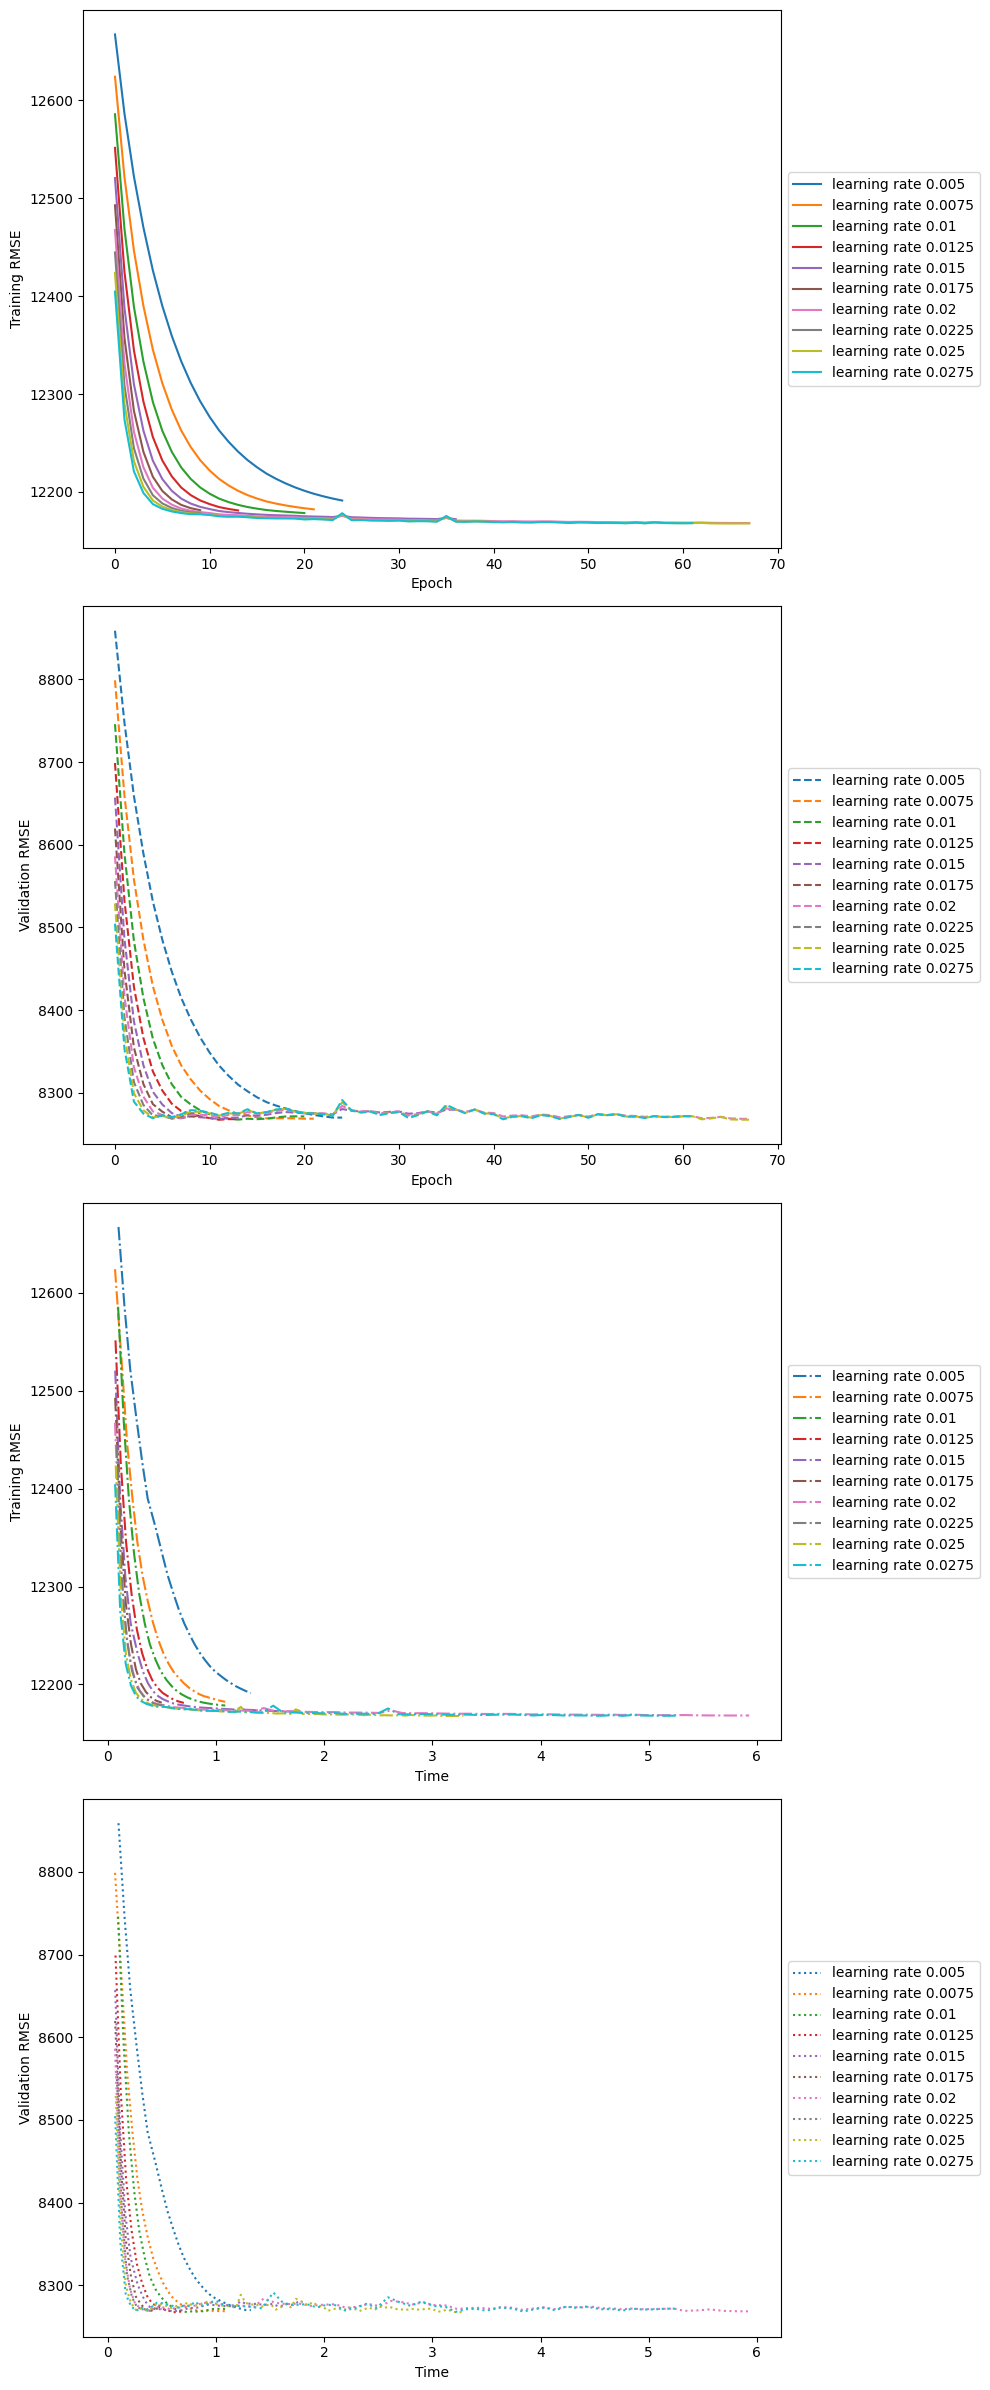

In [ ]:
start_value = 0.005 # starting learning rate
step_size = 0.0025 # increment
num_entries = 10 # total 10 learning rates

lr_list = [round(start_value + i * step_size,4) for i in range(num_entries)] # Creating the learning rate list

num_colors = 10
color_map = plt.cm.tab10
color_list = [color_map(i) for i in np.linspace(0, 1, num_colors)]

fig, axes = plt.subplots(4, figsize=(10, 24))
for i in range(len(lr_list)):
  w_gd,rmse_gd_tr,rmse_gd,ep_time,_ = mini_batch_SGD(df_train=df_train,df_val=df_val,batch_size=2048,lr=lr_list[i],CT=0.00002)
  #Plot the training and validation RMSE vs. epoch (x-axis) for all the learning rates that you tried in a figure
  axes[0].plot(rmse_gd_tr,label='learning rate '+str(lr_list[i]),color=color_list[i],linestyle='-')
  axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  axes[0].set_ylabel('Training RMSE')
  axes[0].set_xlabel('Epoch')

  axes[1].plot(rmse_gd,label='learning rate '+str(lr_list[i]),color=color_list[i],linestyle='--')
  axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  axes[1].set_ylabel('Validation RMSE')
  axes[1].set_xlabel('Epoch')

  #Plot the training and validation RMSE vs. time (x-axis) for all the learning rates that you tried in a figure
  axes[2].plot(ep_time,rmse_gd_tr,label='learning rate '+str(lr_list[i]),color=color_list[i],linestyle='-.')
  axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  axes[2].set_ylabel('Training RMSE')
  axes[2].set_xlabel('Time')

  axes[3].plot(ep_time,rmse_gd,label='learning rate '+str(lr_list[i]),color=color_list[i],linestyle=':')
  axes[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  axes[3].set_ylabel('Validation RMSE')
  axes[3].set_xlabel('Time')
plt.tight_layout()
plt.show()